In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [27]:
ames = pd.read_csv('cleaned.csv')
test = pd.read_csv('cleaned_test.csv')

In [3]:
#Exploratory Data Analysis

In [28]:
ames.drop(columns=('Unnamed: 0'), inplace = True)
test.drop(columns=('Unnamed: 0'), inplace = True)

In [21]:
ames['Lot Area'].astype('st').str.isin(0)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

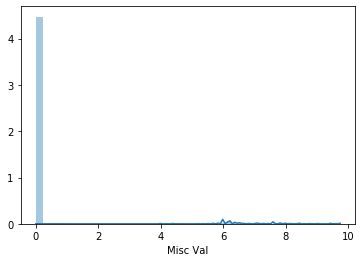

In [15]:
sns.distplot(np.log(ames['Misc Val']+1))

In [12]:
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [13]:
ames['Screen Porch'].value_counts()

0      1870
144       9
168       8
180       7
192       7
224       6
120       6
216       5
100       4
225       3
142       3
182       3
210       3
189       3
200       3
288       3
147       3
126       3
161       3
155       3
176       2
112       2
170       2
95        2
160       2
156       2
90        2
140       2
322       2
240       2
       ... 
280       1
113       1
312       1
111       1
348       1
184       1
374       1
396       1
410       1
440       1
480       1
490       1
266       1
264       1
260       1
252       1
291       1
234       1
115       1
222       1
220       1
135       1
141       1
208       1
204       1
143       1
198       1
196       1
190       1
385       1
Name: Screen Porch, Length: 100, dtype: int64

In [8]:
def add_age(df):
    new_col = []
    for i in df.index:
        if df['Year Built'][i] > df['Year Remod/Add'][i]:
            new_col.append(df['Year Built'][i])
        else:
            new_col.append(df['Year Remod/Add'][i])
        
    df['Most Recent'] = new_col

    ss = StandardScaler()
    yr = pd.DataFrame(ss.fit_transform(df[['Most Recent']]), columns=['Most Recent'])
    
    new_col = []
    for i in yr.index:
        if yr['Most Recent'][i] >= .8:
            new_col.append('Very New')
        elif yr['Most Recent'][i] >= .5:
            new_col.append('New')
        elif yr['Most Recent'][i] >= .2:
            new_col.append('Newish')
        elif yr['Most Recent'][i] <= -.8:
            new_col.append('Very Old')
        elif yr['Most Recent'][i] <= -.5:
            new_col.append('Old')
        elif yr['Most Recent'][i] <= -.2:
            new_col.append('Oldish')
        else:
            new_col.append('Middle')

    df['Age'] = new_col

In [9]:
add_age(ames)

In [11]:
ames['Fence']

0       No Fence
1       No Fence
2       No Fence
3       No Fence
4       No Fence
5       No Fence
6       No Fence
7       No Fence
8       No Fence
9       No Fence
10      No Fence
11      No Fence
12      No Fence
13      No Fence
14         MnPrv
15         MnPrv
16      No Fence
17      No Fence
18      No Fence
19      No Fence
20      No Fence
21         GdPrv
22         MnPrv
23      No Fence
24         MnPrv
25         MnPrv
26      No Fence
27      No Fence
28      No Fence
29      No Fence
          ...   
2021    No Fence
2022    No Fence
2023    No Fence
2024    No Fence
2025    No Fence
2026    No Fence
2027    No Fence
2028    No Fence
2029    No Fence
2030    No Fence
2031    No Fence
2032    No Fence
2033    No Fence
2034    No Fence
2035    No Fence
2036    No Fence
2037    No Fence
2038    No Fence
2039    No Fence
2040    No Fence
2041    No Fence
2042    No Fence
2043    No Fence
2044    No Fence
2045    No Fence
2046        GdWo
2047    No Fence
2048    No Fen

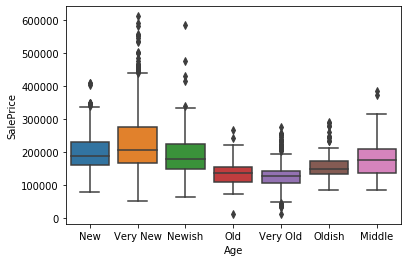

In [10]:
sns.boxplot(x = ames['Age'], y = ames['SalePrice'])

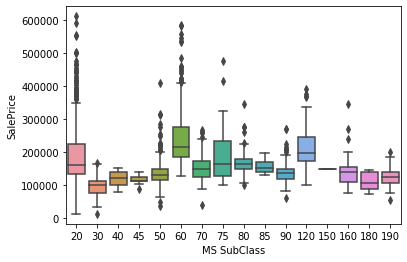

In [8]:
sns.boxplot(x = ames['MS SubClass'], y = ames['SalePrice'])

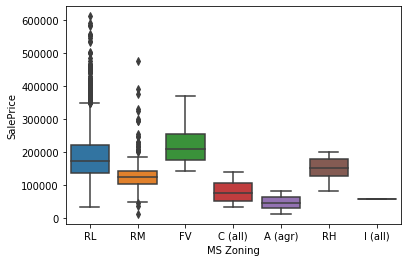

In [9]:
sns.boxplot(x = ames['MS Zoning'], y = ames['SalePrice'])

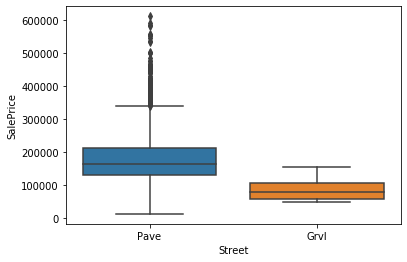

In [10]:
sns.boxplot(x = ames['Street'], y = ames['SalePrice'])

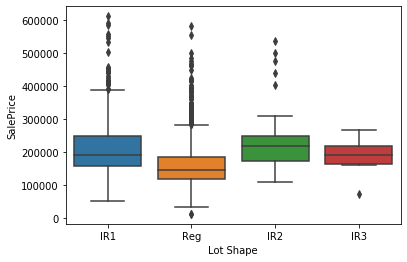

In [12]:
sns.boxplot(x = ames['Lot Shape'], y = ames['SalePrice'])

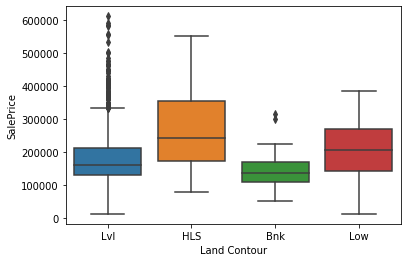

In [14]:
sns.boxplot(x = ames['Land Contour'], y = ames['SalePrice'])

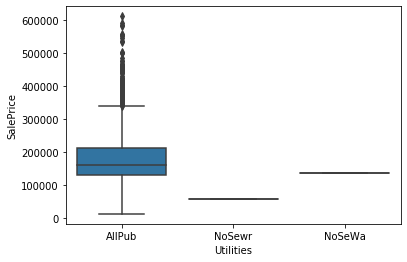

In [15]:
sns.boxplot(x = ames['Utilities'], y = ames['SalePrice'])

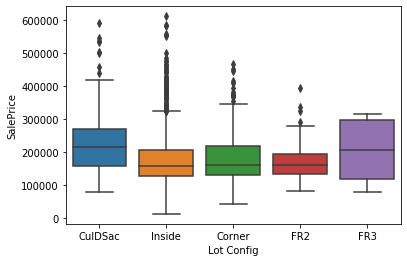

In [16]:
sns.boxplot(x = ames['Lot Config'], y = ames['SalePrice'])

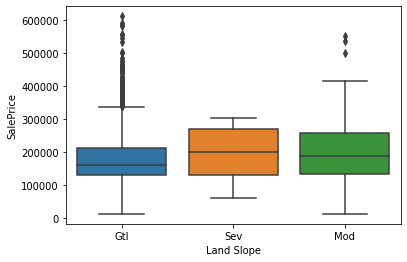

In [17]:
sns.boxplot(x = ames['Land Slope'], y = ames['SalePrice'])

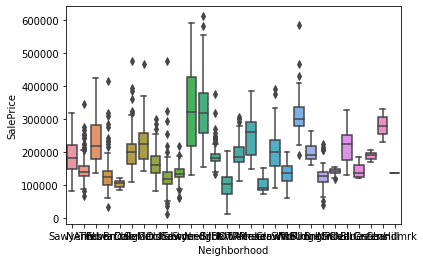

In [18]:
sns.boxplot(x = ames['Neighborhood'], y = ames['SalePrice'])

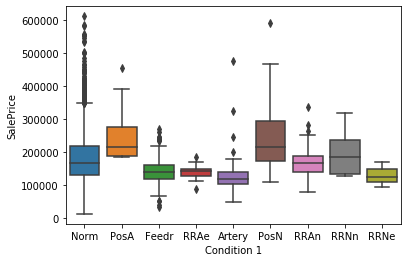

In [19]:
sns.boxplot(x = ames['Condition 1'], y = ames['SalePrice'])

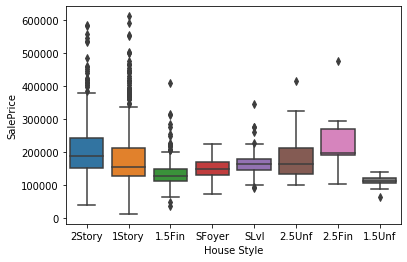

In [20]:
sns.boxplot(x = ames['House Style'], y = ames['SalePrice'])

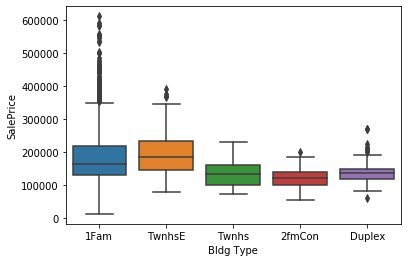

In [23]:
sns.boxplot(x = ames['Bldg Type'], y = ames['SalePrice'])

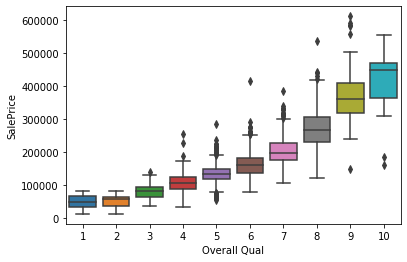

In [24]:
sns.boxplot(x = ames['Overall Qual'], y = ames['SalePrice'])

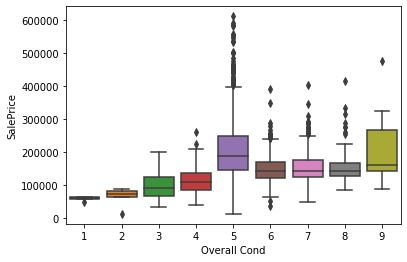

In [25]:
sns.boxplot(x = ames['Overall Cond'], y = ames['SalePrice'])

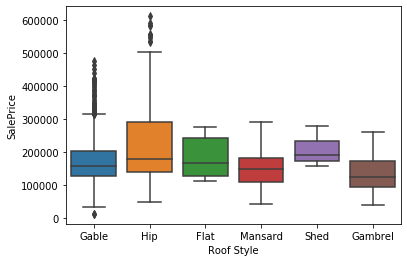

In [27]:
sns.boxplot(x = ames['Roof Style'], y = ames['SalePrice'])

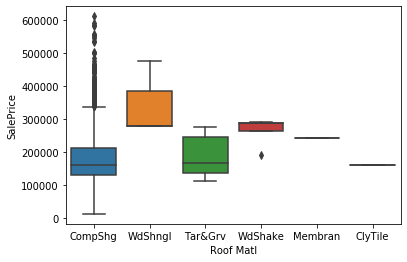

In [28]:
sns.boxplot(x = ames['Roof Matl'], y = ames['SalePrice'])

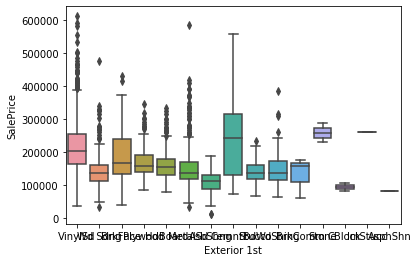

In [22]:
plt.tight_layout()
sns.boxplot(x = ames['Exterior 1st'], y = ames['SalePrice'])

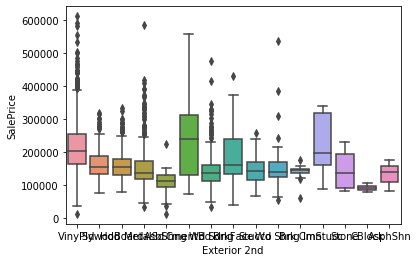

In [30]:
sns.boxplot(x = ames['Exterior 2nd'], y = ames['SalePrice'])

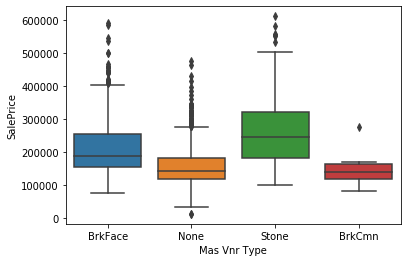

In [31]:
sns.boxplot(x = ames['Mas Vnr Type'], y = ames['SalePrice'])

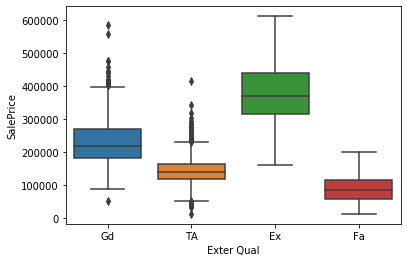

In [33]:
sns.boxplot(x = ames['Exter Qual'], y = ames['SalePrice'])

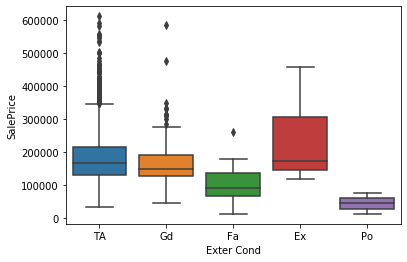

In [34]:
sns.boxplot(x = ames['Exter Cond'], y = ames['SalePrice'])

In [32]:
new_col = []
for i in ames.index:
    if ames['Exter Cond'][i] == 'Po':
        new_col.append(1.0)
    elif ames['Exter Cond'][i]  =='Fa':
        new_col.append(2.0)
    elif ames['Exter Cond'][i]  =='Gd':
        new_col.append(3.0)
    elif ames['Exter Cond'][i]  =='TA':
        new_col.append(4.0)
    elif ames['Exter Cond'][i]  =='Ex':
        new_col.append(5.0)
ames['Exter Cond Num'] = new_col

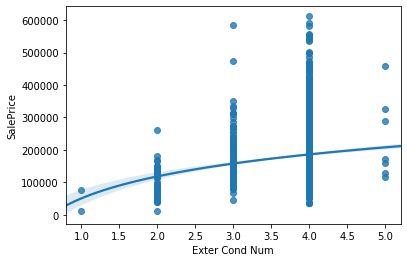

In [36]:
sns.regplot(ames['Exter Cond Num'], ames['SalePrice'], logx=True)

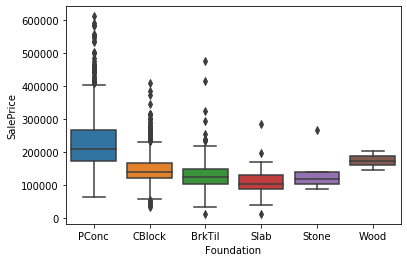

In [35]:
sns.boxplot(x = ames['Foundation'], y = ames['SalePrice'])

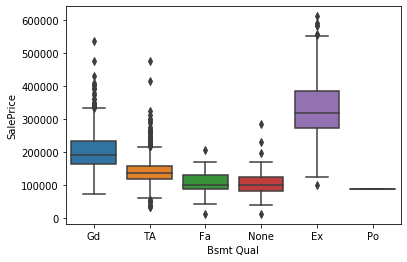

In [36]:
sns.boxplot(x = ames['Bsmt Qual'], y = ames['SalePrice'])

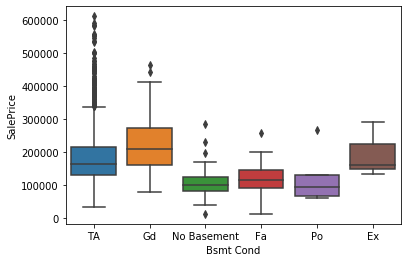

In [37]:
sns.boxplot(x = ames['Bsmt Cond'], y = ames['SalePrice'])

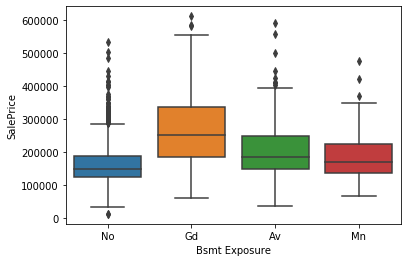

In [38]:
sns.boxplot(x = ames['Bsmt Exposure'], y = ames['SalePrice'])

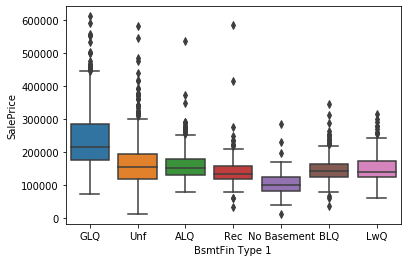

In [39]:
sns.boxplot(x = ames['BsmtFin Type 1'], y = ames['SalePrice'])

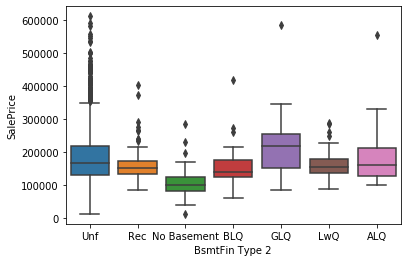

In [40]:
sns.boxplot(x = ames['BsmtFin Type 2'], y = ames['SalePrice'])

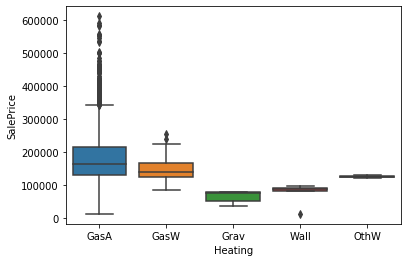

In [41]:
sns.boxplot(x = ames['Heating'], y = ames['SalePrice'])

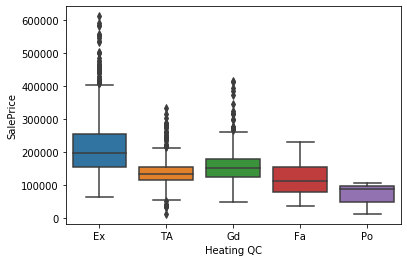

In [43]:
sns.boxplot(x = ames['Heating QC'], y = ames['SalePrice'])

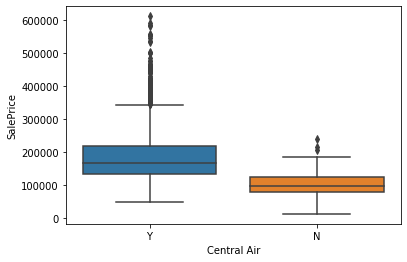

In [44]:
sns.boxplot(x = ames['Central Air'], y = ames['SalePrice'])

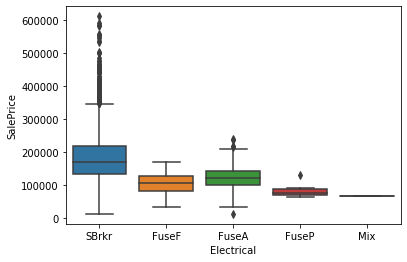

In [45]:
sns.boxplot(x = ames['Electrical'], y = ames['SalePrice'])

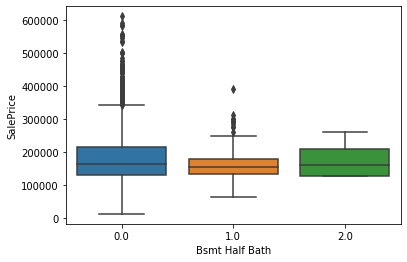

In [47]:
sns.boxplot(x = ames['Bsmt Half Bath'], y = ames['SalePrice'])

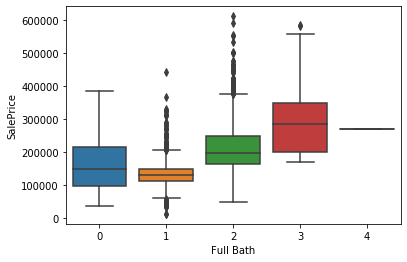

In [48]:
sns.boxplot(x = ames['Full Bath'], y = ames['SalePrice'])

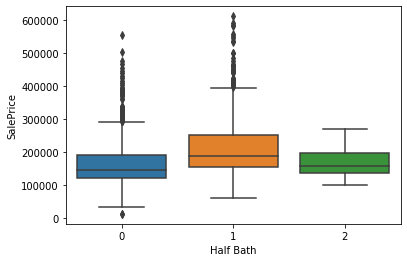

In [49]:
sns.boxplot(x = ames['Half Bath'], y = ames['SalePrice'])

# sns.boxplot(x = ames['Bedroom AbvGr'], y = ames['SalePrice'])

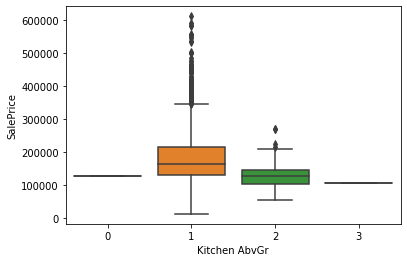

In [51]:
sns.boxplot(x = ames['Kitchen AbvGr'], y = ames['SalePrice'])

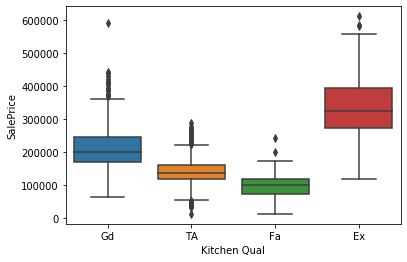

In [52]:
sns.boxplot(x = ames['Kitchen Qual'], y = ames['SalePrice'])

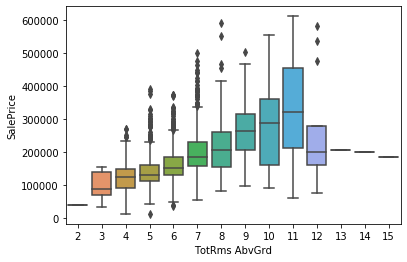

In [53]:
sns.boxplot(x = ames['TotRms AbvGrd'], y = ames['SalePrice'])

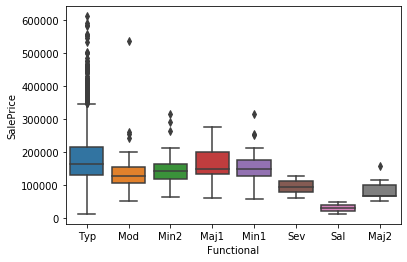

In [54]:
sns.boxplot(x = ames['Functional'], y = ames['SalePrice'])

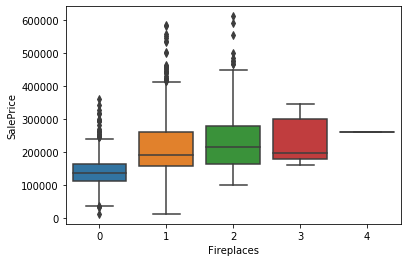

In [55]:
sns.boxplot(x = ames['Fireplaces'], y = ames['SalePrice'])

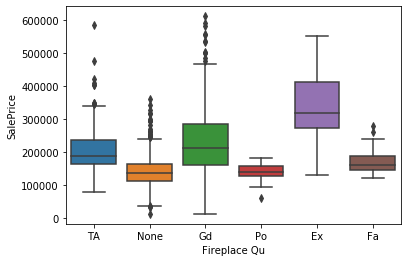

In [57]:
sns.boxplot(x = ames['Fireplace Qu'], y = ames['SalePrice'])

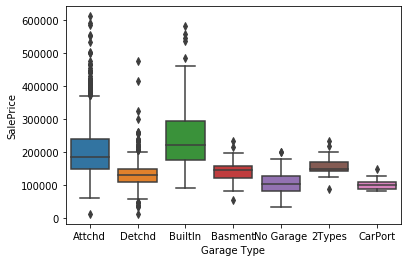

In [58]:
sns.boxplot(x = ames['Garage Type'], y = ames['SalePrice'])

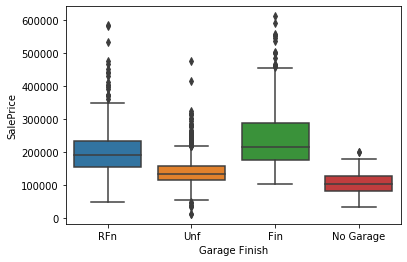

In [60]:
sns.boxplot(x = ames['Garage Finish'], y = ames['SalePrice'])

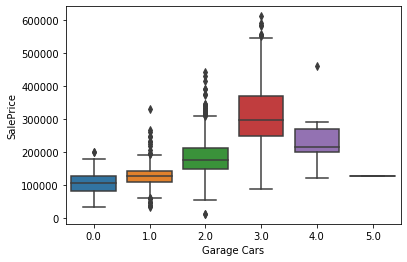

In [61]:
sns.boxplot(x = ames['Garage Cars'], y = ames['SalePrice'])

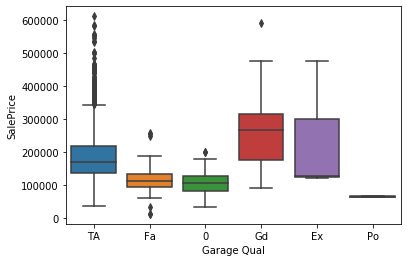

In [62]:
sns.boxplot(x = ames['Garage Qual'], y = ames['SalePrice'])

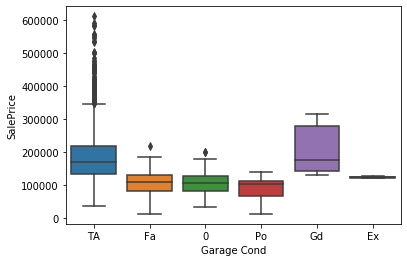

In [63]:
sns.boxplot(x = ames['Garage Cond'], y = ames['SalePrice'])

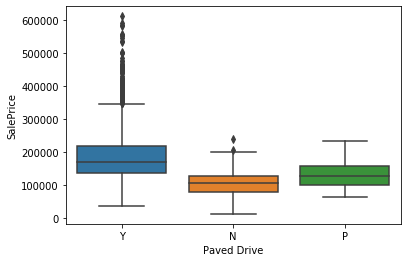

In [64]:
sns.boxplot(x = ames['Paved Drive'], y = ames['SalePrice'])

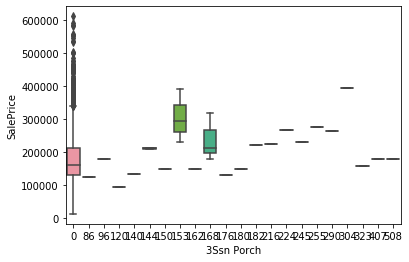

In [67]:
sns.boxplot(x = ames['3Ssn Porch'], y = ames['SalePrice'])

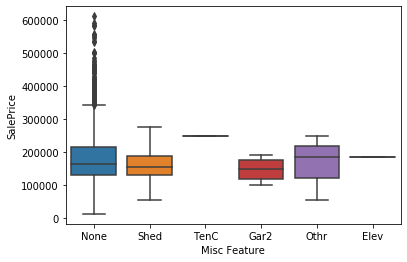

In [69]:
sns.boxplot(x = ames['Misc Feature'], y = ames['SalePrice'])

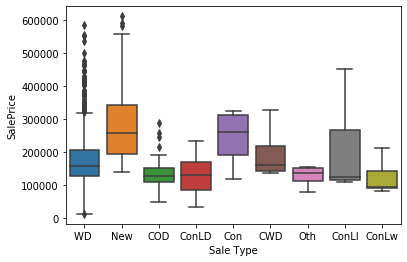

In [70]:
sns.boxplot(x = ames['Sale Type'], y = ames['SalePrice'])